# Trabajo Práctico Individual N°2 - Finanzas

#### IMPORTO LAS LIBRERIAS

In [2]:
import pandas as pd 
import yfinance as yf
import numpy as np
import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### TÓMO LOS DATOS DE UN ARCHIVO WEB HTML

In [3]:
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(payload[0])
df['Symbol'] = df['Symbol'].str.replace('.','-')
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()

data = pd.DataFrame()
for t,s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2000-01-01',end='2021-12-31', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

KeyboardInterrupt: 

#### SE GUARDA EL ARCHIVO COMO CSV

In [ ]:
data.to_csv('stock_prices.csv', sep=',')

In [3]:
data = pd.read_csv('stock_prices.csv', sep=',')

In [4]:
data.drop(columns='Unnamed: 0',inplace=True)

#### VISUALIZO LOS DATOS OBTENIDOS

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS
0,2000-01-03 00:00:00,48.031250,48.250000,47.031250,47.187500,26.434860,2173400.0,MMM,Industrials
1,2000-01-04 00:00:00,46.437500,47.406250,45.312500,45.312500,25.384462,2713800.0,MMM,Industrials
2,2000-01-05 00:00:00,45.562500,48.125000,45.562500,46.625000,26.119736,3699400.0,MMM,Industrials
3,2000-01-06 00:00:00,47.156250,51.250000,47.156250,50.375000,28.220514,5975800.0,MMM,Industrials
4,2000-01-07 00:00:00,50.562500,51.906250,49.968750,51.375000,28.780725,4101200.0,MMM,Industrials
...,...,...,...,...,...,...,...,...,...
2478157,2021-12-23 00:00:00,241.699997,244.389999,240.690002,242.509995,241.697968,1172400.0,ZTS,Health Care
2478158,2021-12-27 00:00:00,244.389999,246.720001,243.080002,246.509995,245.684570,807000.0,ZTS,Health Care
2478159,2021-12-28 00:00:00,247.000000,247.839996,243.639999,244.250000,243.432159,1004400.0,ZTS,Health Care
2478160,2021-12-29 00:00:00,244.020004,247.850006,243.639999,247.029999,246.202835,939900.0,ZTS,Health Care


#### MARCO LOS DIAS DE LA SEMANA EN UNA COLUMNA LLAMADA DAY_OF_WEEK

In [6]:
#agrega una columna con el numero de la semana
data['day_of_week'] = data['Date'].apply(pd.to_datetime).dt.dayofweek

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week
0,2000-01-03 00:00:00,48.03125,48.25000,47.03125,47.1875,26.434860,2173400.0,MMM,Industrials,0
1,2000-01-04 00:00:00,46.43750,47.40625,45.31250,45.3125,25.384462,2713800.0,MMM,Industrials,1
2,2000-01-05 00:00:00,45.56250,48.12500,45.56250,46.6250,26.119736,3699400.0,MMM,Industrials,2
3,2000-01-06 00:00:00,47.15625,51.25000,47.15625,50.3750,28.220514,5975800.0,MMM,Industrials,3
4,2000-01-07 00:00:00,50.56250,51.90625,49.96875,51.3750,28.780725,4101200.0,MMM,Industrials,4


#### CÁLCULO DEL RETORNO DE LOS MOVIMIENTOS INTRADIARIOS:

In [8]:
#crea una columna para calcular el retorno de los movimientos intradiarios
data['r_intra'] =data.apply(lambda row: np.log(row.Close/row.Open), axis=1)
#coloca cero en los valores nulos de la columna
data.r_intra.fillna(0, inplace=True)

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra
0,2000-01-03 00:00:00,48.03125,48.25000,47.03125,47.1875,26.434860,2173400.0,MMM,Industrials,0,-0.017723
1,2000-01-04 00:00:00,46.43750,47.40625,45.31250,45.3125,25.384462,2713800.0,MMM,Industrials,1,-0.024524
2,2000-01-05 00:00:00,45.56250,48.12500,45.56250,46.6250,26.119736,3699400.0,MMM,Industrials,2,0.023052
3,2000-01-06 00:00:00,47.15625,51.25000,47.15625,50.3750,28.220514,5975800.0,MMM,Industrials,3,0.066028
4,2000-01-07 00:00:00,50.56250,51.90625,49.96875,51.3750,28.780725,4101200.0,MMM,Industrials,4,0.015941


In [10]:
#cambio el formato de la fecha de timestamp a string
data["Date"] = pd.to_datetime(data["Date"]).apply(lambda x:x.strftime('%d-%m-%Y'))

#### CÁLCULO DEL RETORNO DE LOS MOVIMIENTOS GAP:

In [11]:
#creo una columna close2 desfasada una fila
data['Close2']=data.shift(periods=1).Close
#creo una columna para calcular el retorno de los movimiento gap
data['r_gap'] = data.apply(lambda row: np.log(row.Open/row.Close2), axis = 1).fillna(0)


In [12]:
#pongo un cero donde cambia el Tiker
for i in range(0,data.shape[0]-1):
    if data.loc[i,'Ticker']!= data.loc[i+1,'Ticker']:
            data['r_gap'][i+1] = 0

C:\Users\Lea\AppData\Local\Temp\ipykernel_14656\458465328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['r_gap'][i+1] = 0


In [13]:
#elimino la columna close2
data.drop(columns=['Close2'], inplace=True)

#### CÁLCULO DE LA VARIACION:

In [14]:
#creo la columna variacion para poner el cambio porcentual entre el elemento actual y el anterior. 
data['Variacion'] = data['Adj Close'].pct_change()

In [15]:
#pongo un cero en Variacion donde cambia el Tiker
for i in range(0,data.shape[0]-1):
    if data.loc[i,'Ticker']!= data.loc[i+1,'Ticker']:
            data['Variacion'][i+1] = 0

C:\Users\Lea\AppData\Local\Temp\ipykernel_14656\2820909183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Variacion'][i+1] = 0


In [16]:
#coloco un cero donde tengo valores nulos
data.Variacion.fillna(0, inplace=True)

#### VISUALIZO COMO QUEDO LA TABLA CON LAS COLUMNAS CALCULADAS

In [17]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,day_of_week,r_intra,r_gap,Variacion
0,03-01-2000,48.03125,48.25000,47.03125,47.1875,26.434860,2173400.0,MMM,Industrials,0,-0.017723,0.000000,0.000000
1,04-01-2000,46.43750,47.40625,45.31250,45.3125,25.384462,2713800.0,MMM,Industrials,1,-0.024524,-0.016022,-0.039735
2,05-01-2000,45.56250,48.12500,45.56250,46.6250,26.119736,3699400.0,MMM,Industrials,2,0.023052,0.005502,0.028965
3,06-01-2000,47.15625,51.25000,47.15625,50.3750,28.220514,5975800.0,MMM,Industrials,3,0.066028,0.011330,0.080429
4,07-01-2000,50.56250,51.90625,49.96875,51.3750,28.780725,4101200.0,MMM,Industrials,4,0.015941,0.003715,0.019851


In [18]:
#Agrupo por dias de la semana y calculo la media de los retornos de movimientos gap
data2 = data.groupby('day_of_week')['r_gap'].mean().reset_index()

In [19]:
#creo un diccionario para colocarle los dias de la semana a la tabla
dias_semanas = {'Lunes':0,'Martes':1 ,'Miercoles':2 ,'Jueves': 3, 'Viernes': 4}

In [20]:
#coloco los dias de la semana a la tabla data 2
data2['dias_semanas'] = dias_semanas

In [21]:
data2

,day_of_week,r_gap,dias_semanas
0,0,0.000041,Lunes
1,1,0.000578,Martes
2,2,0.000116,Miercoles
3,3,0.000057,Jueves
4,4,0.000222,Viernes


### GRÁFICO DE RETORNO DE MOVIMIENTOS GAP POR DIA DE SEMANA

<AxesSubplot:xlabel='dias_semanas', ylabel='r_gap'>

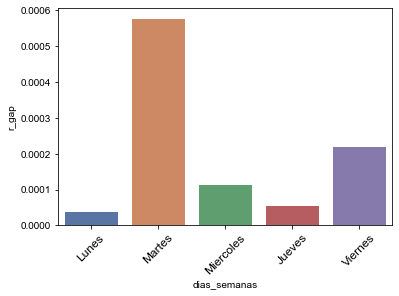

In [22]:
#grafico el retorno de movimientos gap por dia de la semana
plt.xticks(fontsize=12,rotation=45)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = data2, x='dias_semanas', y='r_gap')

### El mejor dia para invertir teniendo en cuenta el retorno de los movimiento gap es el dia lunes, ya que es cuando la cotizacion tiene el nivel mas bajo de la semana y el martes abre mas alto mayormente.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
#Agrupo por dias de semana y le calculo la media del retorno de los movimientos intradiarios
data3 = data.groupby('day_of_week')['r_intra'].mean().reset_index()

In [24]:
data3['dias_semanas'] = dias_semanas

### GRÁFICO DE RETORNO DE MOVIMIENTOS INTRADIARIOS POR DIA DE SEMANA

<AxesSubplot:xlabel='dias_semanas', ylabel='r_intra'>

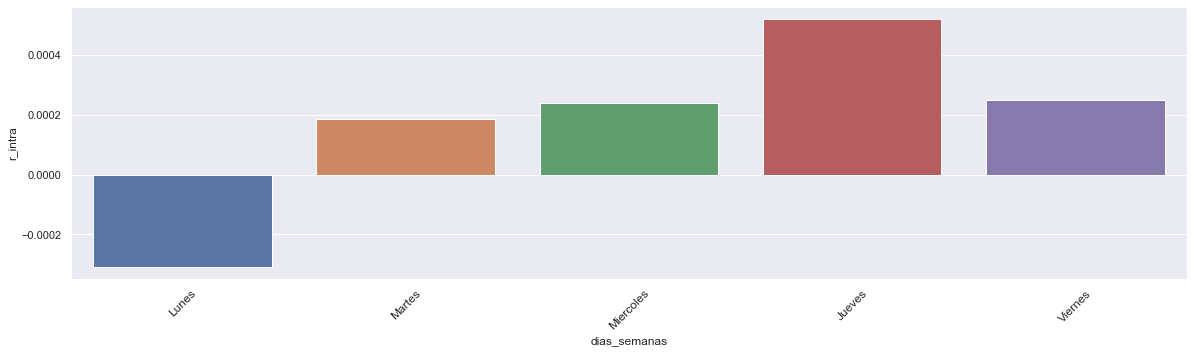

In [25]:
#Grafico el retorno de movimientos intradiarios por dia de semana
plt.xticks(fontsize=12,rotation=45)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = data3, x= 'dias_semanas', y='r_intra')

### El mejor día para invertir teniendo en cuenta el retorno de los movimientos intradiarios es el jueves cuando abre, ya que es el dia que mas sube la cotizacion en el dia.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## ANÁLISIS DE DATOS DE MOVIMIENTOS GAP

### GRAFICO DE DISTRIBUCION DE VALORES

(-0.1, 0.1)

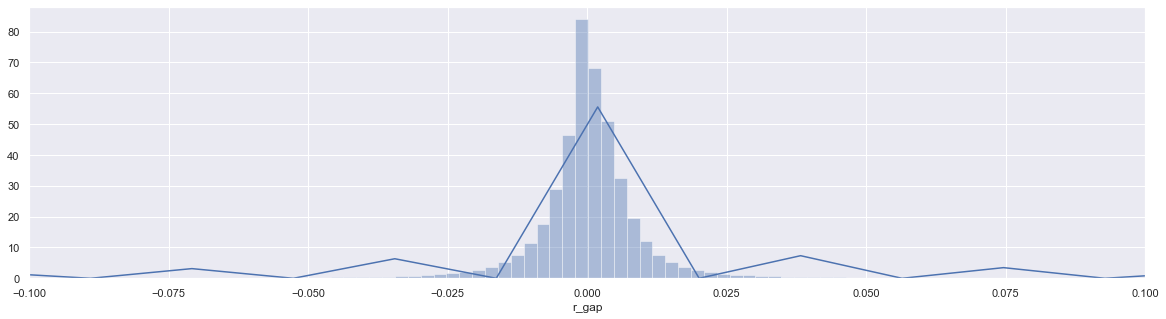

In [26]:
fig = plt.figure()
ax = plt.axes()
sns.distplot(data["r_gap"], bins=1000)
plt.xlim(-0.1, 0.1)

#### GRAFICO DE OUTLIERS EN LA COLUMNA

(-0.1, 0.1)

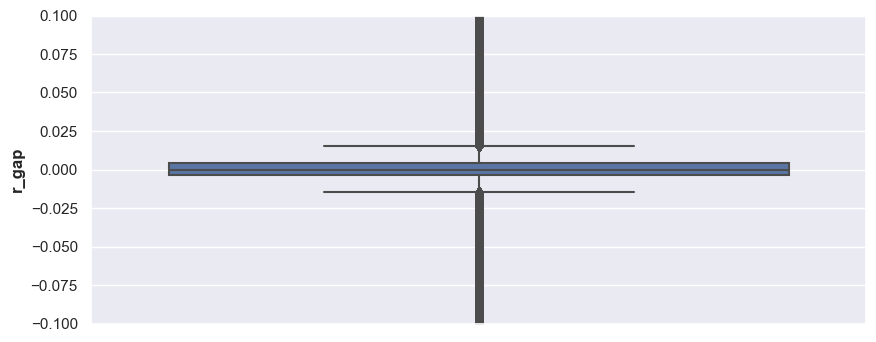

In [60]:
ax = sns.boxplot(y=data["r_gap"])
plt.ylim(-0.1, 0.1)

#### GRAFICO DE OUTLIERS POR DIA DE LA SEMANA

(-0.1, 0.1)

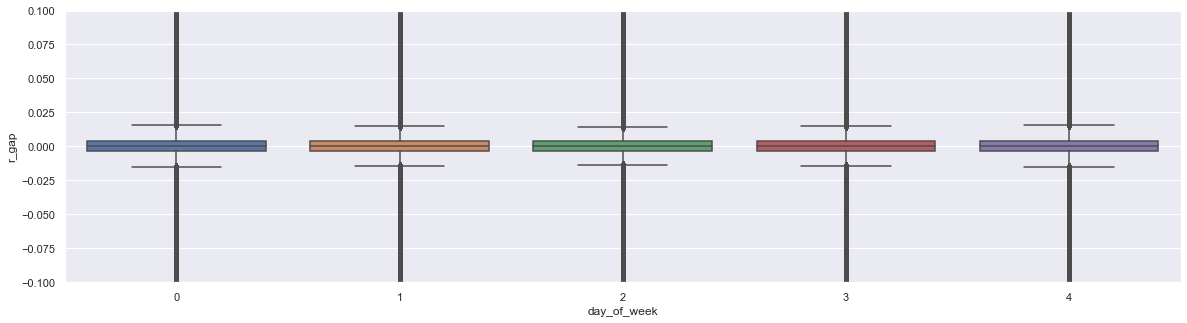

In [28]:
ax = sns.boxplot(x="day_of_week", y="r_gap", data=data)
plt.ylim(-0.1, 0.1)

## ANÁLISIS DE DATOS DE MOVIMIENTOS INTRADIARIOS

### GRAFICO DE DISTRIBUCION DE VALORES

(-0.1, 0.1)

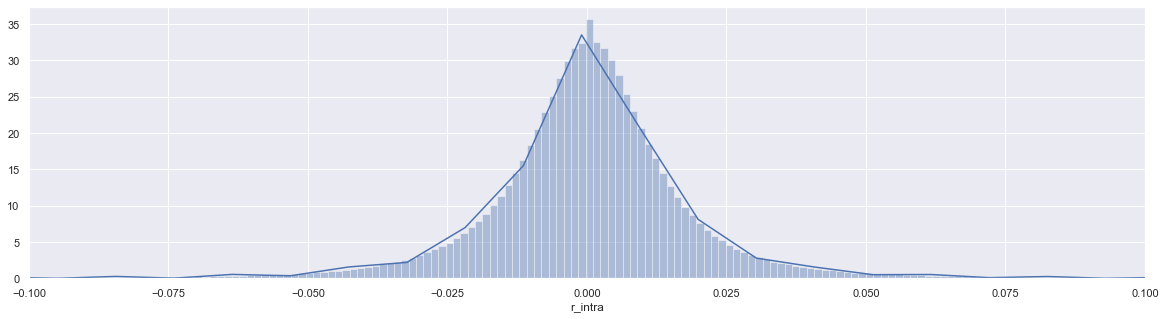

In [29]:
fig = plt.figure()
ax = plt.axes()
sns.distplot(data["r_intra"], bins=1000)
plt.xlim(-0.1, 0.1)

### GRAFICO DE OULIERS EN LA COLUMNA

(-0.1, 0.1)

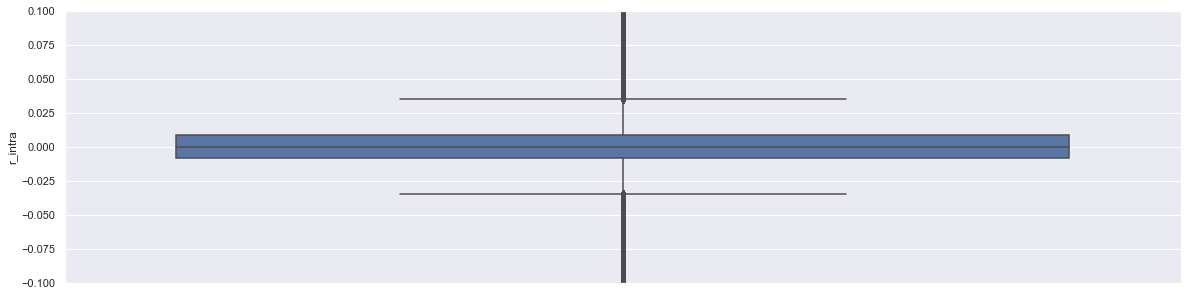

In [30]:
ax = sns.boxplot(y=data["r_intra"])
plt.ylim(-0.1, 0.1)

### GRAFICO DE OUTLIERS POR DIAS DE LA SEMANA

(-0.1, 0.1)

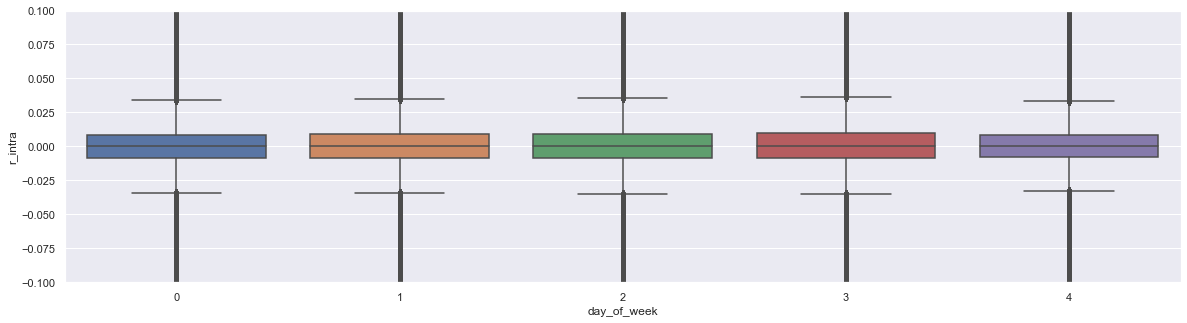

In [31]:
ax = sns.boxplot(x="day_of_week", y="r_intra", data=data)
plt.ylim(-0.1, 0.1)

# ANÁLISIS DE DATOS DE VARIACION

### GRAFICO DE DISTRIBUCION DE VALORES

(-0.1, 0.1)

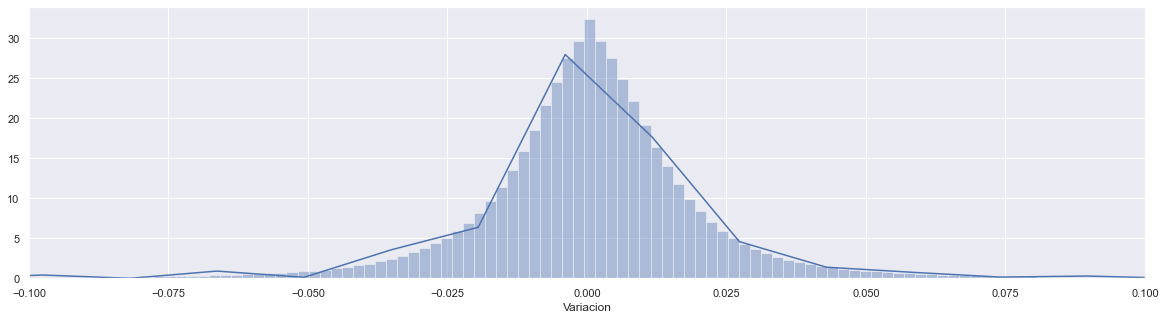

In [32]:
fig = plt.figure()
ax = plt.axes()
sns.distplot(data["Variacion"], bins=1000)
plt.xlim(-0.1, 0.1)

### GRAFICO DE OULIERS EN LA COLUMNA

(-0.1, 0.1)

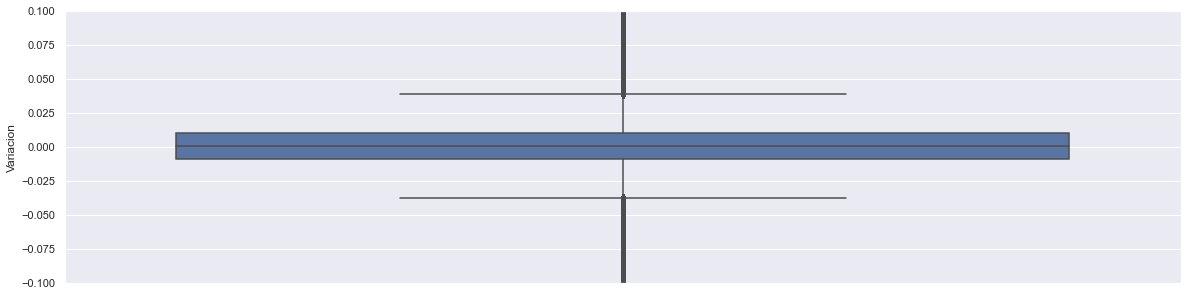

In [33]:
ax = sns.boxplot(y=data["Variacion"])
plt.ylim(-0.1, 0.1)

### GRÁFICO DE VARIACION POR INDUSTRIAS

<AxesSubplot:xlabel='GICS', ylabel='Variacion'>

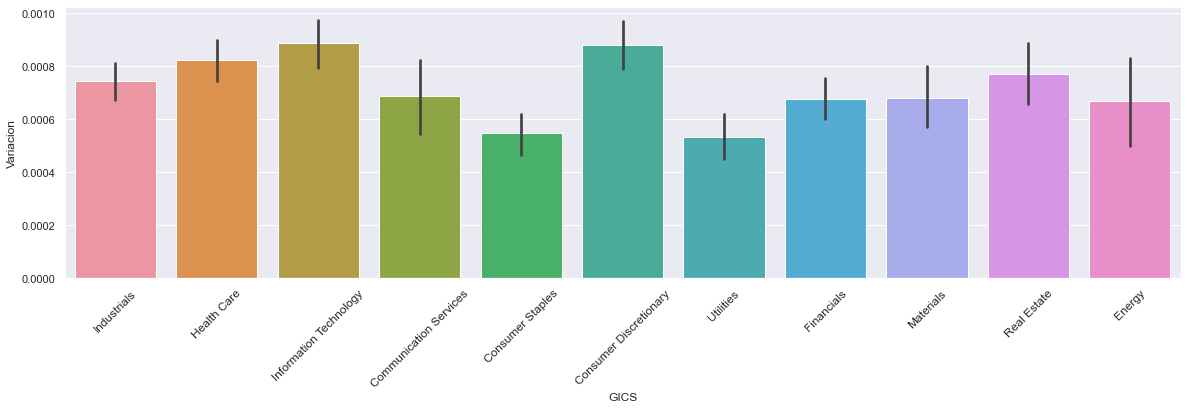

In [34]:
plt.xticks(fontsize=12,rotation=45)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= data, x = 'GICS', y = "Variacion")

#### Se visualiza que las industrias de informacion tecnologica, consumo discrecional y cuidados de la salud son las que tuvieron mayor variacion a lo largo del tiempo

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Cuales son las mejores industrias que pertenecen al SP500 en las cuales se puede invertir

In [35]:
#cambio el tipo de dato a fecha
data['Date'] = data['Date'].apply(pd.to_datetime)

c:\Users\Lea\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '13-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
c:\Users\Lea\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '14-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
c:\Users\Lea\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '18-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  mapped = lib.map_infer(
c:\Users\Lea\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\apply.py:1137: UserWarning: Parsing '19-01-2000' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  

#### TOMO LOS DATOS DEL DIA 2020-02-01 

In [36]:
#me quedo solo con los regristros del 2020-02-01 y creo un nuevo df
gics_inicio = data[(data["Date"] == '2020-02-01')].reset_index()
#elimino las columnas que no necesito
gics_inicio = gics_inicio.drop(columns=['Open','High','Low','Close','Volume','day_of_week','r_intra','r_gap','index','Variacion'])
#renombro la columna que voy a usar
gics_inicio.rename(columns={'Adj Close':'Adj Close 1'}, inplace = True)

In [37]:
gics_inicio

,Date,Adj Close 1,Ticker,GICS
0,2020-02-01,164.922318,MMM,Industrials
1,2020-02-01,45.638031,AOS,Industrials
2,2020-02-01,83.667686,ABT,Health Care
3,2020-02-01,79.461990,ABBV,Health Care
4,2020-02-01,168.809998,ABMD,Health Care
...,...,...,...,...
494,2020-02-01,97.649078,YUM,Consumer Discretionary
495,2020-02-01,259.140015,ZBRA,Information Technology
496,2020-02-01,142.187546,ZBH,Health Care
497,2020-02-01,48.681541,ZION,Financials


#### TOMO LOS DATOS DEL ULTIMO DIA DE MI DF

In [38]:
#me quedo con los registros del ultimo dia registrado y lo guardo en un df
gics_final = data[(data["Date"] == data['Date'].max())].reset_index()
#elimino las columnas que no voy a utilizar
gics_final = gics_final.drop(columns=['Open','High','Low','Close','Volume','day_of_week','r_intra','r_gap','Variacion','index'])
#renombro la columna que voy a utilizar
gics_final.rename(columns={'Adj Close':'Adj Close 2'}, inplace = True)

In [39]:
gics_final

,Date,Adj Close 2,Ticker,GICS
0,2021-12-30,174.179047,MMM,Industrials
1,2021-12-30,84.596825,AOS,Industrials
2,2021-12-30,139.946625,ABT,Health Care
3,2021-12-30,133.400192,ABBV,Health Care
4,2021-12-30,362.059998,ABMD,Health Care
...,...,...,...,...
497,2021-12-30,137.071228,YUM,Consumer Discretionary
498,2021-12-30,597.539978,ZBRA,Information Technology
499,2021-12-30,124.015053,ZBH,Health Care
500,2021-12-30,62.372440,ZION,Financials


#### HAGO UNA UNION ENTRE LAS DOS TABLAS OBTENIDAS EN ESAS FECHAS ATRAVEZ DE LA COLUMNA TICKER

In [40]:
#uno los dos df atravez de los registros iguales de la columna ticker y genero un nuevo df
industrias = pd.merge(gics_inicio,gics_final, how='outer', on=["Ticker"])

In [41]:
industrias.head()

,Date_x,Adj Close 1,Ticker,GICS_x,Date_y,Adj Close 2,GICS_y
0,2020-02-01,164.922318,MMM,Industrials,2021-12-30,174.179047,Industrials
1,2020-02-01,45.638031,AOS,Industrials,2021-12-30,84.596825,Industrials
2,2020-02-01,83.667686,ABT,Health Care,2021-12-30,139.946625,Health Care
3,2020-02-01,79.461990,ABBV,Health Care,2021-12-30,133.400192,Health Care
4,2020-02-01,168.809998,ABMD,Health Care,2021-12-30,362.059998,Health Care


#### CALCULO LA COLUMNA CRECIMIENTO PARA SABER EL CRECIMIENTO QUE TUVO ENTRE ESAS DOS FECHAS

In [42]:
#elimino las columnas que no voy a usar
industrias.drop(columns=['Date_x','Date_y','GICS_y'], inplace=True)
#creo una nueva columna donde calculo el crecimiento que hubo desde 2020-02-01 hasta 2021-12-30
industrias['Crecimiento'] =industrias.apply(lambda row: np.log(row['Adj Close 2']/row['Adj Close 1']), axis=1)
#reseteo el indice
industrias.reset_index(inplace= True)
#elimino el indice anterior
industrias.drop(columns=['index'])
#elimino los registros que me quedaron nulos o sin datos
industrias.dropna(inplace=True)


#### AGRUPO POR INDUSTRIAS Y SACO LA MEDIA DE LOS CRECIMIENTOS

In [43]:
#creo una copia del df agrupado por industrias y me quedo con los promedios de los crecimientos
industrias2 = industrias.groupby('GICS_x')['Crecimiento'].mean().reset_index()

### GRAFICO EL CRECIMIENTO POR INDUSTRIA

<AxesSubplot:xlabel='GICS_x', ylabel='Crecimiento'>

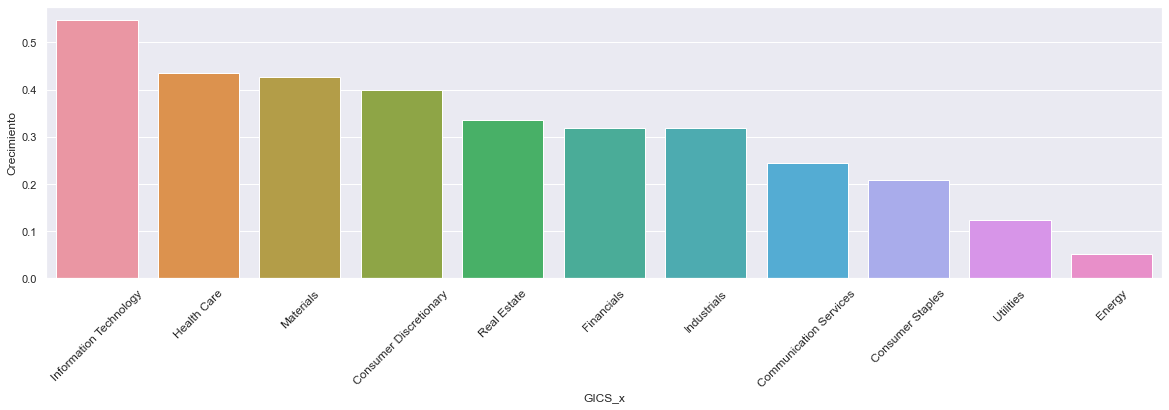

In [44]:
#genero un grafico para poder ver cuales fueron las industrias con mayor creciemiento en ese periodo
plt.xticks(fontsize=12,rotation=45)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= industrias2, x = 'GICS_x', y = "Crecimiento", order=industrias2.sort_values('Crecimiento',ascending = False).GICS_x)

### Tomando los registros de los ultimos dos años, las mejores industrias que pertenecen al SP500 en las cuales se puede invertir son: 
#### Information Technology, Health Care, Materials 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Cuales fueron los momentos de alta volatilidad que afectaron al SP500

In [45]:
#Genero una copia del df
data4 = data.copy()

#### CALCULO DE VOLATILIDAD

In [46]:
#calculo la volatilidad 
data4['Volatilidad'] = (data['Variacion'].rolling(250).std()*100*(250)**0.5).fillna(0)

#### AGRUPO POR FECHA Y SACO MEDIA DE LAS COLUMNAS

In [47]:
#agrupo por fecha y saco la media de las columnas
data_v = data4.groupby('Date').agg({'Open':'mean','High':'mean','Low':'mean','Close':'mean','Adj Close':'mean','Volume':'mean','r_intra':'mean', 'r_gap':'mean', 'Variacion':'mean','Volatilidad':'mean'})

In [48]:
data_v = data_v.reset_index()

In [49]:
data_v

,Date,Open,High,Low,Close,Adj Close,Volume,r_intra,r_gap,Variacion,Volatilidad
0,1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,30.885809
1,2000-01-02,31.750990,32.375555,31.093326,31.898312,21.017514,4.847450e+06,0.006061,0.001062,0.007746,31.304503
2,2000-01-03,31.895313,32.642844,31.046466,31.886495,21.685091,7.149580e+06,0.001558,0.002409,0.004801,33.743131
3,2000-01-05,33.287814,34.221673,32.733912,33.448118,22.108026,4.403878e+06,0.009698,0.002274,0.012608,41.895890
4,2000-01-06,32.608633,33.680402,32.227889,33.251929,21.791737,6.232366e+06,0.013332,0.004661,0.018839,43.882480
...,...,...,...,...,...,...,...,...,...,...,...
5532,2021-12-23,207.720016,210.014809,206.630581,208.317295,207.231894,3.317322e+06,0.003045,0.003601,0.006717,27.855354
5533,2021-12-27,208.969371,211.693098,207.886691,211.150560,210.057979,3.136105e+06,0.011140,0.001485,0.012812,27.876868
5534,2021-12-28,211.377639,212.977615,209.639568,211.049277,209.953821,2.970485e+06,0.001395,-0.000019,0.001417,27.868475
5535,2021-12-29,211.227197,213.212482,209.979929,211.966213,210.867507,2.804370e+06,0.002501,0.000345,0.002888,27.848032


### GRÁFICO DE VOLATILIDAD

In [50]:
fig = px.line(data_v, x='Date', y='Volatilidad', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

### Los momentos de alta volatilidad fueron, en el año 2000, desde el 2008 al 2011 y desde el 2020 al 2021

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# GRÁFICOS PARA COMPARAR EL INDICE VIX CON EL INDICE S&P500

#### GRAFICO DE INDICE S&P500

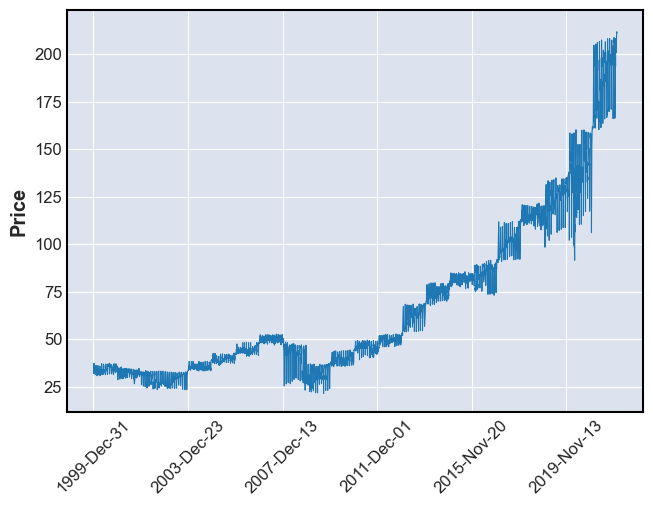

In [51]:
dataprueba = data.groupby("Date").agg({ 'Open':'mean', 'High':'mean', 'Low':'mean', 'Close':'mean', 'Adj Close':'mean','r_intra':'mean', 'r_gap':'mean', 'Variacion':'mean'})
mpf.plot(dataprueba, type='line')

In [52]:
#tomo el indice vix desde el año 2000 
Vix = yf.download('VIX', start='2000-01-01',end='2021-12-31', progress=False)

#### GRAFICO DE INDICE VIX

c:\Users\Lea\AppData\Local\Programs\Python\Python39\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




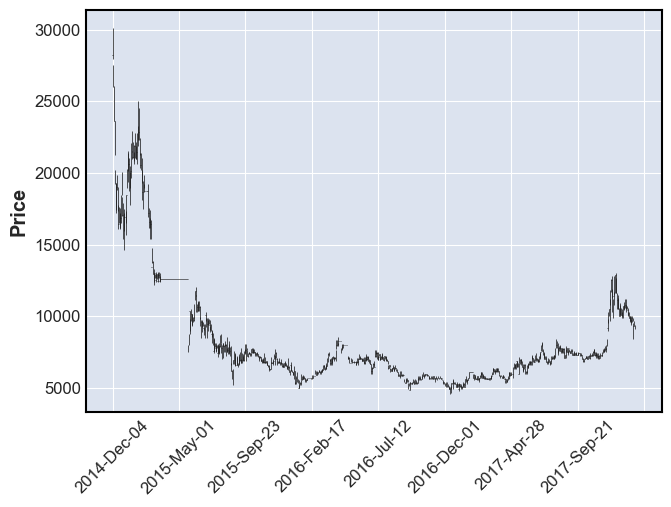

In [53]:
mpf.plot(Vix)

### Como se ve en los graficos el indice VIX y el S&P500 son inversamente proporcionales, ya que el VIX es índice de referencia que mide las expectativas del mercado en cuanto a la volatilidad futura, sirve como un termómetro del sentimiento de los inversores. 

--------------------------------------------------------------------------------------------------------------------------------------------------------------

# Cuales son las 9 mejores empresas para invertir

#### TOMO REGISTROS DEL DIA 2020-02-01

In [54]:
#me quedo solo con los regristros del 2020-02-01 y creo un nuevo df
ticker_inicio = data[(data["Date"] == '2020-02-01')].reset_index()
#elimino las columnas que no necesito
ticker_inicio = ticker_inicio.drop(columns=['Open','High','Low','Close','Volume','day_of_week','r_intra','r_gap','index','Variacion'])
#renombro la columna que voy a usar
ticker_inicio.rename(columns={'Adj Close':'Adj Close 1'}, inplace = True)

#### TOMO REGISTROS DEL ULTIMO DIA DEL DF

In [55]:
#me quedo con los registros del ultimo dia registrado y lo guardo en un df
ticker_final = data[(data["Date"] == data['Date'].max())].reset_index()
#elimino las columnas que no voy a utilizar
ticker_final = ticker_final.drop(columns=['Open','High','Low','Close','Volume','day_of_week','r_intra','r_gap','Variacion','index'])
#renombro la columna que voy a utilizar
ticker_final.rename(columns={'Adj Close':'Adj Close 2'}, inplace = True)

#### UNO LAS TABLAS CON LOS REGISTROS EN DICHAS FECHAS ATRAVEZ DE TICKER

In [56]:
#uno los dos df atravez de los registros iguales de la columna ticker y genero un nuevo df
empresas = pd.merge(ticker_inicio,ticker_final, how='outer', on=["Ticker"])

#### CALCULO LA VARIACION PORCENTUAL QUE TUVO EN ESE RANGO DE TIEMPO DE APROXIMADAMENTE 2 AÑOS

In [57]:
#elimino las columnas que no voy a usar
empresas.drop(columns=['Date_x','Date_y','GICS_y'], inplace=True)
#creo una nueva columna donde calculo la variacion porcentual que hubo desde 2020-02-01 hasta 2021-12-30
empresas["Var %"] = empresas.apply(lambda row: (((row["Adj Close 2"]/row["Adj Close 1"])-1)*100), axis = 1).fillna(0)
#reseteo el indice
empresas.reset_index(inplace= True)
#elimino el indice anterior
empresas.drop(columns=['index'])
#elimino los registros que me quedaron nulos o sin datos
empresas.dropna(inplace=True)
empresas = empresas.sort_values("Var %", ascending=False)
empresas = empresas.head(9)

### GRÁFICO DE CRECIMIENTO POR EMPRESA

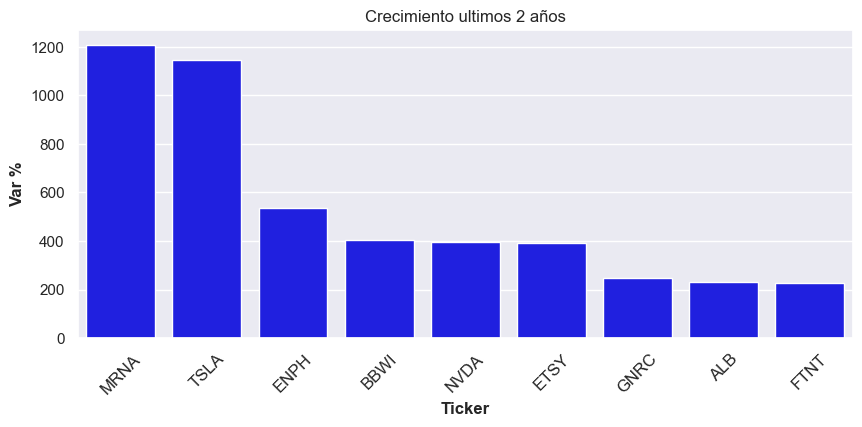

In [58]:
sns.set(rc={'figure.figsize':(10,4)})
plt.xticks(fontsize=12,rotation=45)
sns.barplot(data = empresas, x='Ticker', y='Var %', color="blue").set(title="Crecimiento ultimos 2 años")
plt.show()

### Tomando desde el año 2020 en adelante, las 9 mejores empresas para invertir son:
### Moderna Inc, Tesla Inc, Enphase Energy, Bath & Body Works Inc, Nvidia, Etsy, Generac Holdings Inc, Albemarle Corporation y Fortinet.